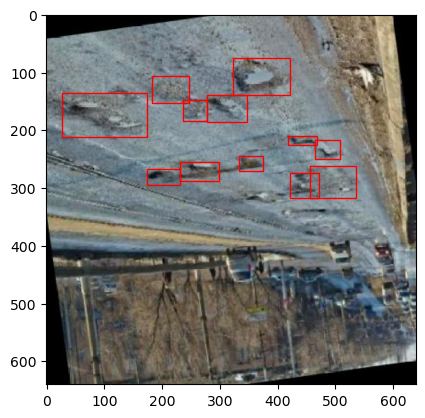

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

def show_image_with_boxes(image_path, boxes):
    # Open image
    img = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)

    width, height = img.size
    # Add bounding boxes
    for box in boxes:
        # Extract box coordinates (normalized)
        x_norm, y_norm, w_norm, h_norm = box
        
        # Convert normalized coordinates to pixel values
        x = x_norm * width
        y = y_norm * height
        w = w_norm * width
        h = h_norm * height

        # Create a Rectangle patch
        rect = patches.Rectangle((x - w/2, y - h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    # Show plot
    plt.show()

def bbox(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
        boxes = []
        for i in range(len(lines)):
            line = lines[i].split(' ')
            x = float(line[1])
            y = float(line[2])
            w = float(line[3])
            h = float(line[4])
            # print(x, y, w, h)
            boxes.append((x, y, w, h))
    return boxes
# Example usage
path = 'potholes0_png_jpg.rf.3e90971629af3f862c24298d8a1b5069'
image_path = os.path.join('.', 'data', 'pothole_split', 'train', f'{path}.jpg') # Path to the image
label_path = os.path.join('.', 'data', 'pothole_split', 'train', f'{path}.txt')
boxes = bbox(label_path)
# print(boxes)
show_image_with_boxes(image_path, boxes)